# Supervised learning introduction, K-Nearest Neighbors

## 1. Read data

    Read the provided winequality-red.csv file.
    Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.
    Use all columns except the last as features and the quality column as target.
    Make 80-20% train test split (use sklearn).
    Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) You will have to use the one-hot encoded labels in the classification exercise only.
    Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('winequality-red.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.drop_duplicates(ignore_index=True, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']
X.shape

(1359, 11)

In [7]:
y.shape

(1359,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1087, 11)
(272, 11)
(272,)


In [10]:
type_one_hot = pd.get_dummies(y_train, prefix='quality')
y_train, type_one_hot

(1207    6
 452     5
 954     6
 807     7
 1220    6
        ..
 951     5
 643     5
 842     5
 453     6
 244     6
 Name: quality, Length: 1087, dtype: int64,
       quality_3  quality_4  quality_5  quality_6  quality_7  quality_8
 1207          0          0          0          1          0          0
 452           0          0          1          0          0          0
 954           0          0          0          1          0          0
 807           0          0          0          0          1          0
 1220          0          0          0          1          0          0
 ...         ...        ...        ...        ...        ...        ...
 951           0          0          1          0          0          0
 643           0          0          1          0          0          0
 842           0          0          1          0          0          0
 453           0          0          0          1          0          0
 244           0          0          0     

In [11]:
def normalize_mean(data):
    return (data-data.mean())/data.std()

In [12]:
x_train = normalize_mean(x_train)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1207,-0.011962,-1.468487,0.505144,-0.835890,-0.242226,-0.744242,-0.703069,0.365890,-0.314996,0.250028,-0.761323
452,-0.589844,-0.891253,1.118311,-0.005900,0.008337,2.235112,1.806141,-0.063871,0.332264,0.718210,0.529887
954,-1.167726,-0.314018,-1.385455,-0.835890,-0.680711,1.081814,-0.400754,-2.427558,0.914799,-1.037475,1.728869
807,1.086015,-0.478942,0.760630,-0.383168,-0.346627,-0.840350,-0.793763,-0.568841,-1.091709,0.776733,0.622117
1220,-0.589844,0.785476,-1.283260,-0.232261,-0.325747,1.466247,1.382901,-0.568841,0.073360,0.132982,0.591374
...,...,...,...,...,...,...,...,...,...,...,...
951,-1.572244,0.730501,-1.385455,-0.005900,-0.451028,-0.840350,-0.944920,-2.234165,1.367882,-0.452246,2.282244
643,-1.052150,0.483115,-1.385455,-0.458622,-0.471908,-0.648133,-0.854226,0.258450,0.979525,-0.042587,-1.130241
842,-0.358691,-0.753816,-0.772288,-0.609529,0.196259,0.312948,-0.582143,-0.407680,-0.962257,-0.978952,-0.945782
453,0.854862,-1.523462,1.118311,0.145007,0.008337,-0.071484,-0.400754,0.795651,0.720621,1.420485,-0.392406


In [13]:
x_test = (x_test-x_train.mean())/x_train.std()
x_test.shape

(272, 11)

## 2. KNN regression
    Implement naive K nearest neighbour regression as a function only using python and numpy
    Use Euclidean distance as a measure of distance.
    Make prediction with k=20 for the test set using the training data.
    Plot the true and the predicted values from the test set on a scatterplot.

In [14]:
def euclidean(vec1, vec2):
    return np.linalg.norm(vec1 - vec2, axis=1)

In [15]:
def knn_regression (x_test, x_train, y_train, k=20):
    neighbors = []
    temp = []

    for i in np.array(x_test):
        distances = euclidean(i, np.array(x_train))

        enumerated_distances = list(enumerate(distances))
        print(enumerated_distances)
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            temp.append(sorted_distances[j][0])

        neighbors.append(temp)
        temp = []

    neighbors = np.array(neighbors)
    y_pred = np.array(y_train)[neighbors].sum(axis=1)/k

    return y_pred

In [16]:
y_pred = knn_regression(x_test, x_train, y_train, k=20)
y_pred

[(0, 3.795221949958713), (1, 5.487021388331887), (2, 5.3928168734545086), (3, 4.521819137241056), (4, 3.988759370393537), (5, 6.948891200896765), (6, 4.805656353821374), (7, 3.8874020475636843), (8, 4.829117632035569), (9, 4.493128638872182), (10, 3.6480577002363535), (11, 2.584617227300036), (12, 4.637068579963774), (13, 3.28879650741154), (14, 5.195664837516424), (15, 4.246864051287879), (16, 3.085311569541405), (17, 3.7698777714851532), (18, 5.771798108082161), (19, 5.402415140508053), (20, 2.484749348042065), (21, 2.0975992085467072), (22, 5.481132030610352), (23, 5.704330438127692), (24, 4.168976951475598), (25, 1.8030266657268834), (26, 4.141870808027901), (27, 6.642083372471978), (28, 2.9860430500194495), (29, 3.840108235029817), (30, 4.8043220222944685), (31, 2.7103192565591687), (32, 3.1823017093672155), (33, 5.303619688420458), (34, 4.907098084763248), (35, 6.907467778793816), (36, 1.6321290129035149), (37, 4.834077493170869), (38, 2.960803850851992), (39, 6.64946942457091), 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[(0, 2.3780545629607635), (1, 3.361270384938296), (2, 4.928621635633796), (3, 3.741812202388942), (4, 3.2954813031489136), (5, 6.583073707234034), (6, 4.659254795720507), (7, 2.588209563456348), (8, 4.426035161898459), (9, 4.331963725043006), (10, 3.1953989752218748), (11, 2.5109924350485042), (12, 4.006040673671977), (13, 2.656435397168015), (14, 4.56556955621265), (15, 1.6848414462665364), (16, 2.600276664387048), (17, 3.1479160100208987), (18, 3.7473710654097294), (19, 3.333686584578492), (20, 3.273694979943736), (21, 2.361633112620112), (22, 4.09073589383652), (23, 3.3938345785363824), (24, 3.1303117141161367), (25, 2.701887523353928), (26, 3.8912009988752505), (27, 7.4883253356477955), (28, 2.8716589524660785), (29, 2.88495658629579), (30, 4.311304317882113), (31, 2.863452051932124), (32, 3.2685474200583573), (33, 4.539108100905487), (34, 4.378591860780844), (35, 6.480246497683885), (36, 3.788245401923335), (37, 3.525480279308851), (38, 3.4099268897571746), (39, 4.4679759061410875

array([5.05, 5.25, 5.45, 5.95, 6.3 , 6.4 , 6.  , 5.55, 5.2 , 5.35, 5.2 ,
       5.45, 6.3 , 5.35, 6.45, 6.15, 6.3 , 5.45, 6.25, 6.4 , 5.55, 5.95,
       5.9 , 5.35, 5.35, 5.7 , 5.55, 5.55, 5.35, 6.  , 5.25, 5.45, 5.95,
       5.85, 6.4 , 5.55, 6.4 , 5.8 , 4.95, 5.4 , 5.3 , 5.55, 6.15, 6.8 ,
       5.8 , 5.35, 5.2 , 6.05, 6.45, 5.3 , 5.65, 5.65, 5.1 , 5.8 , 5.3 ,
       5.55, 5.15, 6.  , 5.75, 5.6 , 5.65, 6.7 , 5.4 , 5.65, 5.9 , 6.15,
       6.2 , 5.15, 5.8 , 5.6 , 6.6 , 6.35, 5.6 , 5.35, 5.55, 6.1 , 5.25,
       5.7 , 5.75, 5.95, 5.3 , 5.85, 6.75, 5.1 , 6.05, 5.55, 4.75, 6.2 ,
       5.7 , 6.2 , 5.25, 6.45, 5.2 , 5.7 , 5.55, 5.2 , 5.65, 5.8 , 5.65,
       5.3 , 5.05, 6.15, 6.  , 5.2 , 6.25, 5.75, 5.75, 5.1 , 5.85, 6.1 ,
       5.6 , 6.55, 5.8 , 5.6 , 5.1 , 6.6 , 5.55, 5.65, 5.75, 6.05, 5.1 ,
       5.4 , 5.25, 5.35, 6.4 , 6.2 , 5.6 , 5.05, 5.3 , 5.4 , 5.6 , 6.  ,
       5.5 , 5.4 , 6.4 , 5.8 , 6.3 , 5.5 , 5.65, 6.35, 5.85, 6.1 , 5.9 ,
       5.2 , 5.  , 5.9 , 5.5 , 5.  , 5.25, 5.25, 5.

In [17]:
def plot_knn(x,y,xlabel,ylabel,tilte):
    plt.figure(figsize = (20,10))
    sns.scatterplot(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(tilte, fontsize=20)
    plt.show()

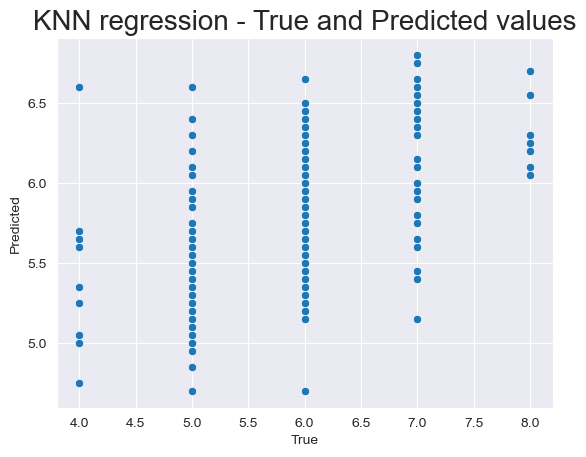

In [18]:
plot_knn(x=y_test, y=y_pred,xlabel="True",ylabel="Predicted",tilte="KNN regression - True and Predicted values")

## 3. Weighted KNN regression
    Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
    Make prediction with k=20 for the test set using the training data.
    Plot the true and the predicted values from the test set on a scatterplot.

In [19]:
def knn_weighted_regression(x_test, x_train, y_train, k=20):

    neighbors = []
    weights = []

    for i in np.array(x_test):

        temp = []
        temp_weights = []

        distances = euclidean(i, np.array(x_train))
        enumerated_distances = list(enumerate(distances))
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            weight = 1 / sorted_distances[j][1]
            temp.append(sorted_distances[j][0])
            temp_weights.append(weight)

        neighbors.append(temp)
        weights.append(temp_weights)

    neighbors = np.array(neighbors)
    weights = np.array(weights)
    y_pred = np.array(y_train)[neighbors]
    y_pred = ((y_pred * weights).sum(axis=1) / weights.sum(axis=1))

    return y_pred

In [20]:
y_pred_w = knn_weighted_regression(x_test, x_train, y_train, k=20)
y_pred_w

array([5.05020298, 5.25172824, 5.45125678, 5.93721138, 6.30680352,
       6.34937492, 5.98073049, 5.55279308, 5.22663517, 5.34677023,
       5.36492521, 5.84637913, 6.23720492, 5.35490378, 6.40369066,
       6.1375563 , 6.28573339, 5.44680802, 6.23933236, 6.37945204,
       5.54600994, 5.98672558, 5.87405119, 5.35184301, 5.32426319,
       5.69696003, 5.53073482, 5.54701427, 5.43102584, 5.95468112,
       5.21396793, 5.40190938, 5.93975533, 5.86016214, 6.40431566,
       5.53264109, 6.41355986, 5.79742799, 4.94767602, 5.42266304,
       5.27861416, 5.46292544, 6.12442247, 6.77757914, 5.80805332,
       5.3656996 , 5.19108249, 6.05268167, 6.52070088, 5.26992541,
       5.68549276, 5.65929216, 5.03120436, 5.81651086, 5.27656941,
       5.51514159, 5.14539576, 5.98355965, 5.74138198, 5.59632063,
       5.63887827, 6.70230687, 5.38470057, 5.6403567 , 5.89334494,
       6.13315948, 6.25098726, 5.16750453, 5.82240687, 5.61483997,
       6.63733369, 6.34168666, 5.5750507 , 5.36458225, 5.55091

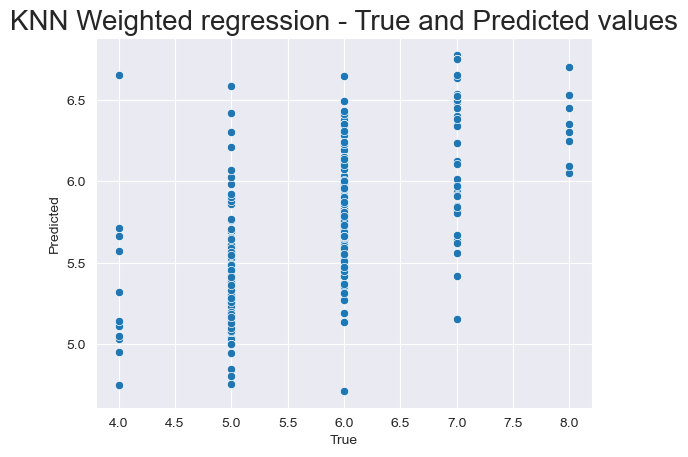

In [21]:
plot_knn(x=y_test, y=y_pred_w,xlabel="True",ylabel="Predicted",tilte="KNN Weighted regression - True and Predicted values")

## KNN classification

    Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
    Make prediction with k=20 for the test set using the training data.

In [22]:
import operator
def onehot_2_normal(X):
    """
    Convert one-hot encoded matrix to 1D array of label indexes.
    """
    return np.array([np.where(i == 1)[0][0]+3 for i in X])

def knn_classifier(x_train, y_train,x_test, k=20):

    neighbors = []


    for i in np.array(x_test):
        temp = []
        distances = euclidean(i, np.array(x_train))
        enumerated_distances = list(enumerate(distances))
        sorted_distances = sorted(enumerated_distances, key=lambda x: x[1])[:k]

        for j in range(k):
            temp.append(sorted_distances[j][0])

        neighbors.append(temp)

    neighbors = np.array(neighbors)
    y_values = np.array(y_train)[neighbors]


    y_vals_max = []
    for i in y_values:
        d = {}
        for j in i:
            if tuple(j) in d:
                d[tuple(j)] += 1
            else:
                d[tuple(j)] = 1
        y_vals_max.append(max(d, key=d.get))

    y_vals_max = np.array(y_vals_max)

    y_pred = onehot_2_normal(y_vals_max)

    return y_pred

In [23]:
y_pred_class = knn_classifier(x_train,type_one_hot,x_test, k=20)
y_pred_class

array([5, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 7, 6, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 5, 6, 7,
       6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       6, 7, 6, 6, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 6, 6, 5,
       5, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 7, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 6, 5, 7, 6, 5], dtype=int64)

In [24]:
plot_dict = {x:{y:0 for y in set(y_test)} for x in set(y_test)}
for index,value in enumerate(y_test):
    plot_dict[value][y_pred_class[index]] += 1

plot_dict = {x:[y for y in y.values()] for x,y in plot_dict.items()}
print(plot_dict)
plotdf = pd.DataFrame.from_dict(plot_dict)
plotdf.index= plot_dict.keys()
plotdf

{4: [0, 7, 3, 1, 0], 5: [0, 86, 37, 2, 0], 6: [0, 27, 61, 5, 0], 7: [0, 3, 21, 11, 0], 8: [0, 0, 5, 3, 0]}


,4,5,6,7,8
4,0,0,0,0,0
5,7,86,27,3,0
6,3,37,61,21,5
7,1,2,5,11,3
8,0,0,0,0,0


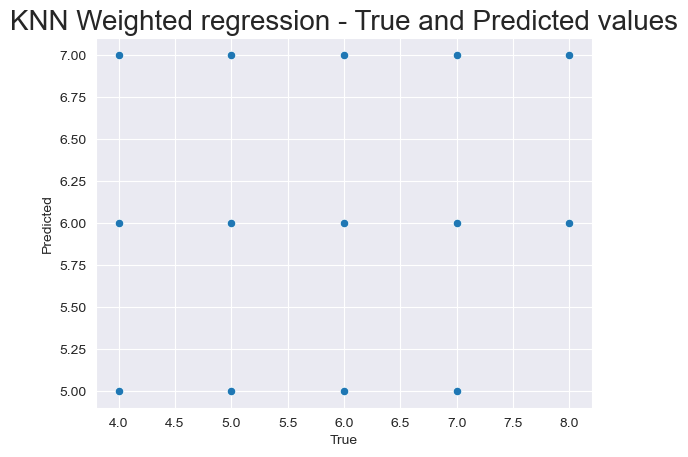

In [25]:
plot_knn(x=y_test, y=y_pred_class,xlabel="True",ylabel="Predicted",tilte="KNN Weighted regression - True and Predicted values")

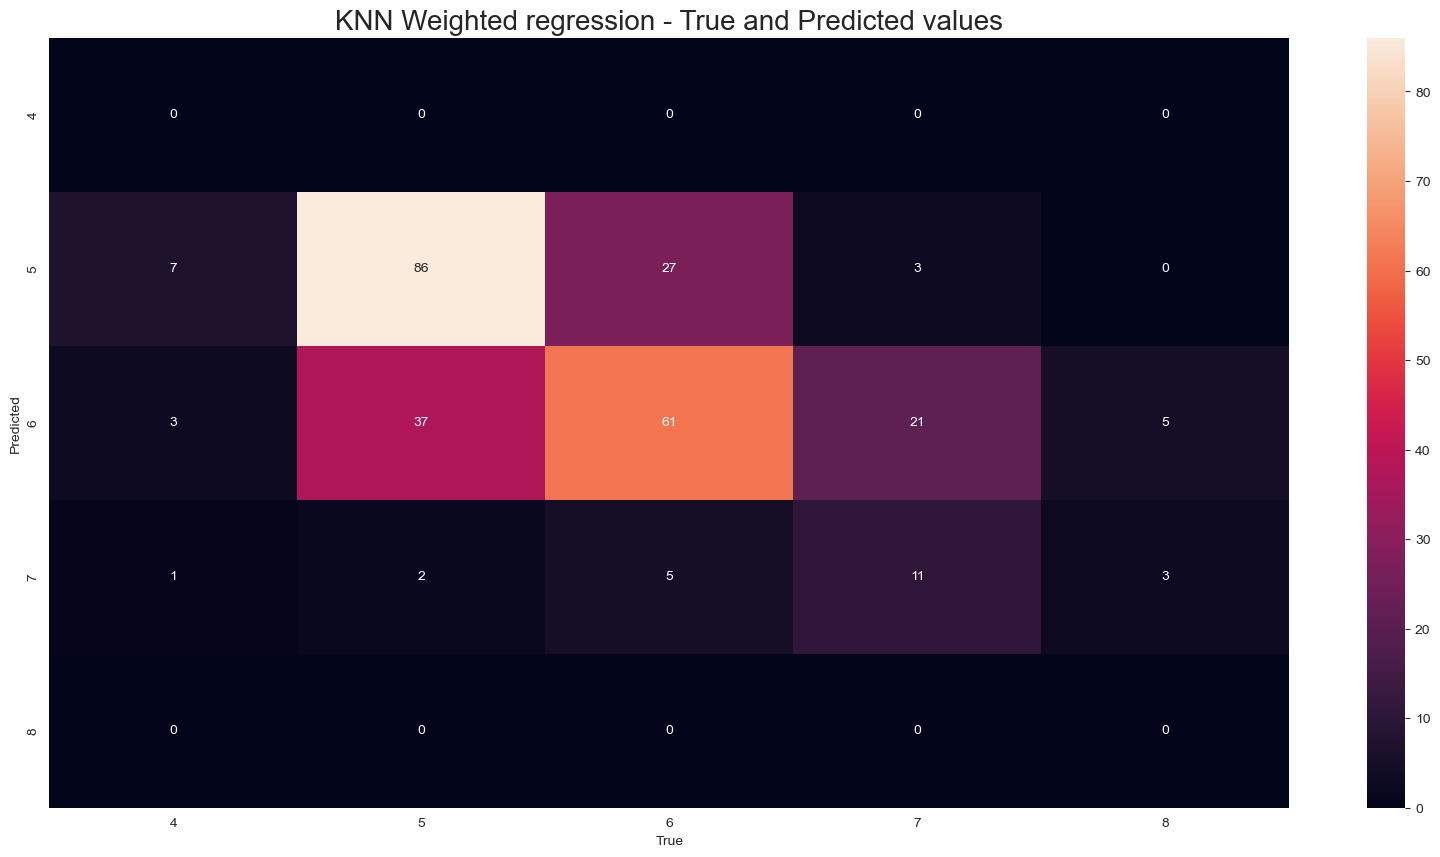

In [26]:
plt.figure(figsize = (20,10))
sns.heatmap(plotdf, annot=True,fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("KNN Weighted regression - True and Predicted values", fontsize=20)
plt.show()

# 5. Compare the models

    Make a baseline model: this can be the mean value of the training labels for every sample.
    Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
    Check your KNN implementations by running the sklearn built-in model. You can run it for any model you implented. The predictions should be the same as yours.
    Write down your observations.

In [27]:
def baseline(y_train, x_test):
    y_pred = []

    for i in np.array(x_test):
        means = y_train.sum() / len((y_train))
        y_pred.append(means)

    return np.array(y_pred)

In [28]:
pred_baseline = baseline(y_train, x_test)
pred_baseline

array([5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729531,
       5.61729531, 5.61729531, 5.61729531, 5.61729531, 5.61729

In [29]:
def compute_accuracy(y_true, y_pred):

    correct_predictions = 0

    for true_val, predicted_val in zip(y_true, y_pred):
        if true_val == int(round(predicted_val)):
            correct_predictions += 1

    accuracy = correct_predictions/len(y_true)

    return accuracy

In [30]:
acc_baseline = compute_accuracy(y_test, pred_baseline)
acc_uni = compute_accuracy(y_test, y_pred)
acc_weighted = compute_accuracy(y_test, y_pred_w)
acc_class = compute_accuracy(y_test, y_pred_class)

print(f'\n Baseline accuracy: {round((acc_baseline*100), 4)} %\
\n Uniform regression accuracy: {round((acc_uni*100), 4)} % \
\n Weighted accuracy {round((acc_weighted*100), 4)} % \
\n Classification accuracy: {round((acc_class*100), 4)} %')


 Baseline accuracy: 34.1912 %
 Uniform regression accuracy: 56.6176 % 
 Weighted accuracy 59.5588 % 
 Classification accuracy: 58.0882 %


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

model = neighbors.KNeighborsRegressor(n_neighbors=20)
model.fit(x_train, y_train)
pred_sci_uni = model.predict(x_test)

print(f'''
KNN classification:

Accuracy built in: {round((compute_accuracy(y_test,pred_sci_uni)*100), 4)} %
Accuracy my prediction: {round((acc_class*100), 4)} %''')



KNN classification:

Accuracy built in: 56.6176 %
Accuracy my prediction: 58.0882 %


In [32]:
model_w_knn = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
model_w_knn.fit(x_train, y_train)
pred_sci_weighted = model_w_knn.predict(x_test)

print(f'''
KNN classification:

Accuracy built in: {round((compute_accuracy(y_test,pred_sci_weighted)*100), 4)} %
Accuracy my prediction: {round((acc_class*100), 4)} %''')


KNN classification:

Accuracy built in: 59.5588 %
Accuracy my prediction: 58.0882 %


In [33]:
model_classifier = neighbors.KNeighborsClassifier(n_neighbors=20)
model_classifier.fit(x_train, y_train)
pred_sci_class = model_classifier.predict(x_test)

print(f'''
KNN classification:

Accuracy built in: {round((compute_accuracy(y_test,pred_sci_class)*100), 4)} %
Accuracy my prediction: {round((acc_class*100), 4)} %''')


KNN classification:

Accuracy built in: 58.4559 %
Accuracy my prediction: 58.0882 %


## Observations

In my opinion there is no significant difference between built in and my prediction.
This data set is not good for KNN, i think the data is not enough for supervised learning.
